In [1]:
from chemicalchecker import ChemicalChecker
ChemicalChecker.set_verbosity('DEBUG') # CRITICAL, ERROR, WARN, INFO or DEBUG
import numpy as np
import pandas as pd
import json
import os
%matplotlib inline
from chemicalchecker.core import DataSignature
# Specify the location of the CC config file. 
# os.environ['CC_CONFIG'] = '/path/to/your_cc_config.json'  #  e.g. chemicalchecker/setup/cc_config.json
os.environ['CC_CONFIG'] = '/aloy/home/acomajuncosa/cc_config.json'

2024-10-21 10:47:46,439 chemicalchecker.core.chemcheck.ChemicalChecker [DEBUG   ] Logging level DEBUG for logger 'chemicalchecker'.


In [2]:
local_cc_dir = '../local_CC_B1'
cc_local = ChemicalChecker(local_cc_dir, dbconnect=False)

2024-10-21 10:47:46,464 chemicalchecker.core.chemcheck.ChemicalChecker [DEBUG   ] ChemicalChecker with root: /aloy/home/acomajuncosa/Protocols/local_CC_B1


In [3]:
# Path to downloaded CC data. Please check Download_Data.ipynb
path_to_data = "/aloy/home/acomajuncosa/CC_data_OLD/"
for sign_type in ['sign0', 'sign1', 'sign2', 'sign3']:
    # Create symlinks
    cc_local.copy_ftp_signatures_in_cc_root(local_cc_dir, os.path.join(path_to_data, sign_type), type_sign=sign_type)

100%|██████████████████████████████████████████| 25/25 [00:00<00:00, 655.00it/s]


## LOAD INPUT DATA -- NEW B1.002 SPACE ##

In [4]:
# Dataset Name
dataset = 'B1.002'

# Input file
inputFile = "../data/B1/repohub_pairs.h5"

# Get old pairs (INCHIKEY-FEATURE)
preprocess_old = "../data/B1/B1.001_preprocess.old.h5"
old_pairs = DataSignature(preprocess_old).get_h5_dataset('pairs')
old_pairs = set([tuple(i) for i in old_pairs])

# Get new pairs (INCHIKEY-FEATURE)
new_pairs = DataSignature(inputFile).get_h5_dataset('pairs')
new_pairs = set([tuple(i) for i in new_pairs])

print("OLD PAIRS: " + str(len(old_pairs)))
print("OLD IKs: " + str(len(set([i[0] for i in old_pairs]))))
print("OLD FEATURES: " + str(len(set([i[1] for i in old_pairs]))))
print("--------------")
print("NEW PAIRS: " + str(len(new_pairs)))
print("NEW IKs: " + str(len(set([i[0] for i in new_pairs]))))
print("NEW FEATURES: " + str(len(set([i[1] for i in new_pairs]))))
print("--------------")

# Merge pairs
merged_pairs = new_pairs.union(old_pairs)
merged_pairs = np.array(sorted(merged_pairs))
print("MERGED PAIRS: " + str(len(merged_pairs)))
print("OVERLAPPING PAIRS: " + str(len(new_pairs.intersection(old_pairs))))

2024-10-21 10:47:47,251 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching dataset pairs
2024-10-21 10:47:47,583 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching dataset pairs


OLD PAIRS: 40093
OLD IKs: 4002
OLD FEATURES: 3201
--------------
NEW PAIRS: 11971
NEW IKs: 4374
NEW FEATURES: 2721
--------------
MERGED PAIRS: 48722
OVERLAPPING PAIRS: 3342


In [5]:
print("NUMBER OF COMPOUNDS: " + str(len(set(merged_pairs[:,0]))))
print("NUMBER OF MoAs: " + str(len(set(merged_pairs[:,1]))))

NUMBER OF COMPOUNDS: 6944
NUMBER OF MoAs: 4626


## sign0 ##

2024-10-21 10:47:53,339 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_B1/full/B/B1/B1.002/sign0
2024-10-21 10:47:53,360 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_B1/reference/B/B1/B1.002/sign0
2024-10-21 10:47:53,377 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Clearing signature /aloy/home/acomajuncosa/Protocols/local_CC_B1/reference/B/B1/B1.002/sign0
2024-10-21 10:47:53,472 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_B1/full/B/B1/B1.002/sign0
2024-10-21 10:47:53,475 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Clearing signature /aloy/home/acomajuncosa/Protocols/local_CC_B1/full/B/B1/B1.002/sign0
2024-10-21 10:47:53,595 chemicalchecker.core.signature_base.BaseSignature [INFO    ] STATUS: FIT START
2024-10-21 10:47:53,61

Features frequency (6944, 1314)


Iterating on `V` axis 0: 100%|████████████████████| 1/1 [00:01<00:00,  1.03s/it]
2024-10-21 10:48:09,861 chemicalchecker.util.sanitize.sanitizer.Sanitizer [INFO    ] Filter 661 keys (min_keys_abs): ['ACAKNPKRLPMONU-UHFFFAOYSA-N' 'ACLUEOBQFRYTQS-JTQLQIEISA-N'
 'ACTRVOBWPAIOHC-XIXRPRMCSA-N' 'AEENEMOEBJOKGN-UZLBHIALSA-N'
 'AFTZZRFCMOAFCR-UHFFFAOYSA-N' 'AFZWZVLPIMHLSE-UHFFFAOYSA-N'
 'AIGAZQPHXLWMOJ-UHFFFAOYSA-N' 'AKIIPHDGVCFVCC-UHFFFAOYSA-N'
 'ALLWOAVDORUJLA-MRXNPFEDSA-N' 'ANMLJLFWUCQGKZ-HXUWFJFHSA-N'
 'AOZPVMOOEJAZGK-UHFFFAOYSA-N' 'ARJCBSRIPGJMAD-LLVKDONJSA-N'
 'ARYQHSWJGHCGJS-UHFFFAOYSA-N' 'ATHGHQPFGPMSJY-UHFFFAOYSA-N'
 'AUNGANRZJHBGPY-SCRDCRAPSA-N' 'AUVVAXYIELKVAI-CKBKHPSWSA-N'
 'AVZCPICCWKMZDT-UHFFFAOYSA-N' 'AWIVHRPYFSSVOG-UHFFFAOYSA-N'
 'AYFVYJQAPQTCCC-GBXIJSLDSA-N' 'AZYDQCGCBQYFSE-GFCCVEGCSA-N'
 'BBQRBOIMSKMFFO-LTGZKZEYSA-N' 'BCPOLXUSCUFDGE-UHFFFAOYSA-N'
 'BDBMLMBYCXNVMC-UHFFFAOYSA-O' 'BEZXGSZPWXRHIN-INIZCTEOSA-N'
 'BGBNULCRKBVAKL-SNVBAGLBSA-N' 'BGVLELSCIHASRV-QPEQYQDCSA-N'
 'BIOVSNW

Flter nans and inf (6283, 1314)
Filter too many features (6283, 1314)


2024-10-21 10:49:20,440 chemicalchecker.core.signature_data.DataSignature [WARNING ] Features are not available
2024-10-21 10:49:54,096 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Mappings are not available, using implicit key-key mappings.
2024-10-21 10:49:54,098 chemicalchecker.util.remove_near_duplicates.remove_near_duplicates.RNDuplicates [DEBUG   ] RNDuplicates to use 128 bits
2024-10-21 10:49:54,102 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_B1/reference/B/B1/B1.002/sign0
[INFO    ] Loading faiss with AVX2 support.
[INFO    ] Successfully loaded faiss with AVX2 support.
2024-10-21 10:49:54,258 chemicalchecker.util.remove_near_duplicates.remove_near_duplicates.RNDuplicates [INFO    ] Removing near duplicates.
2024-10-21 10:49:54,259 chemicalchecker.util.remove_near_duplicates.remove_near_duplicates.RNDuplicates [DEBUG   ] Data input is: /aloy/home/acomajuncosa/Protocols/local_CC_B1/ful

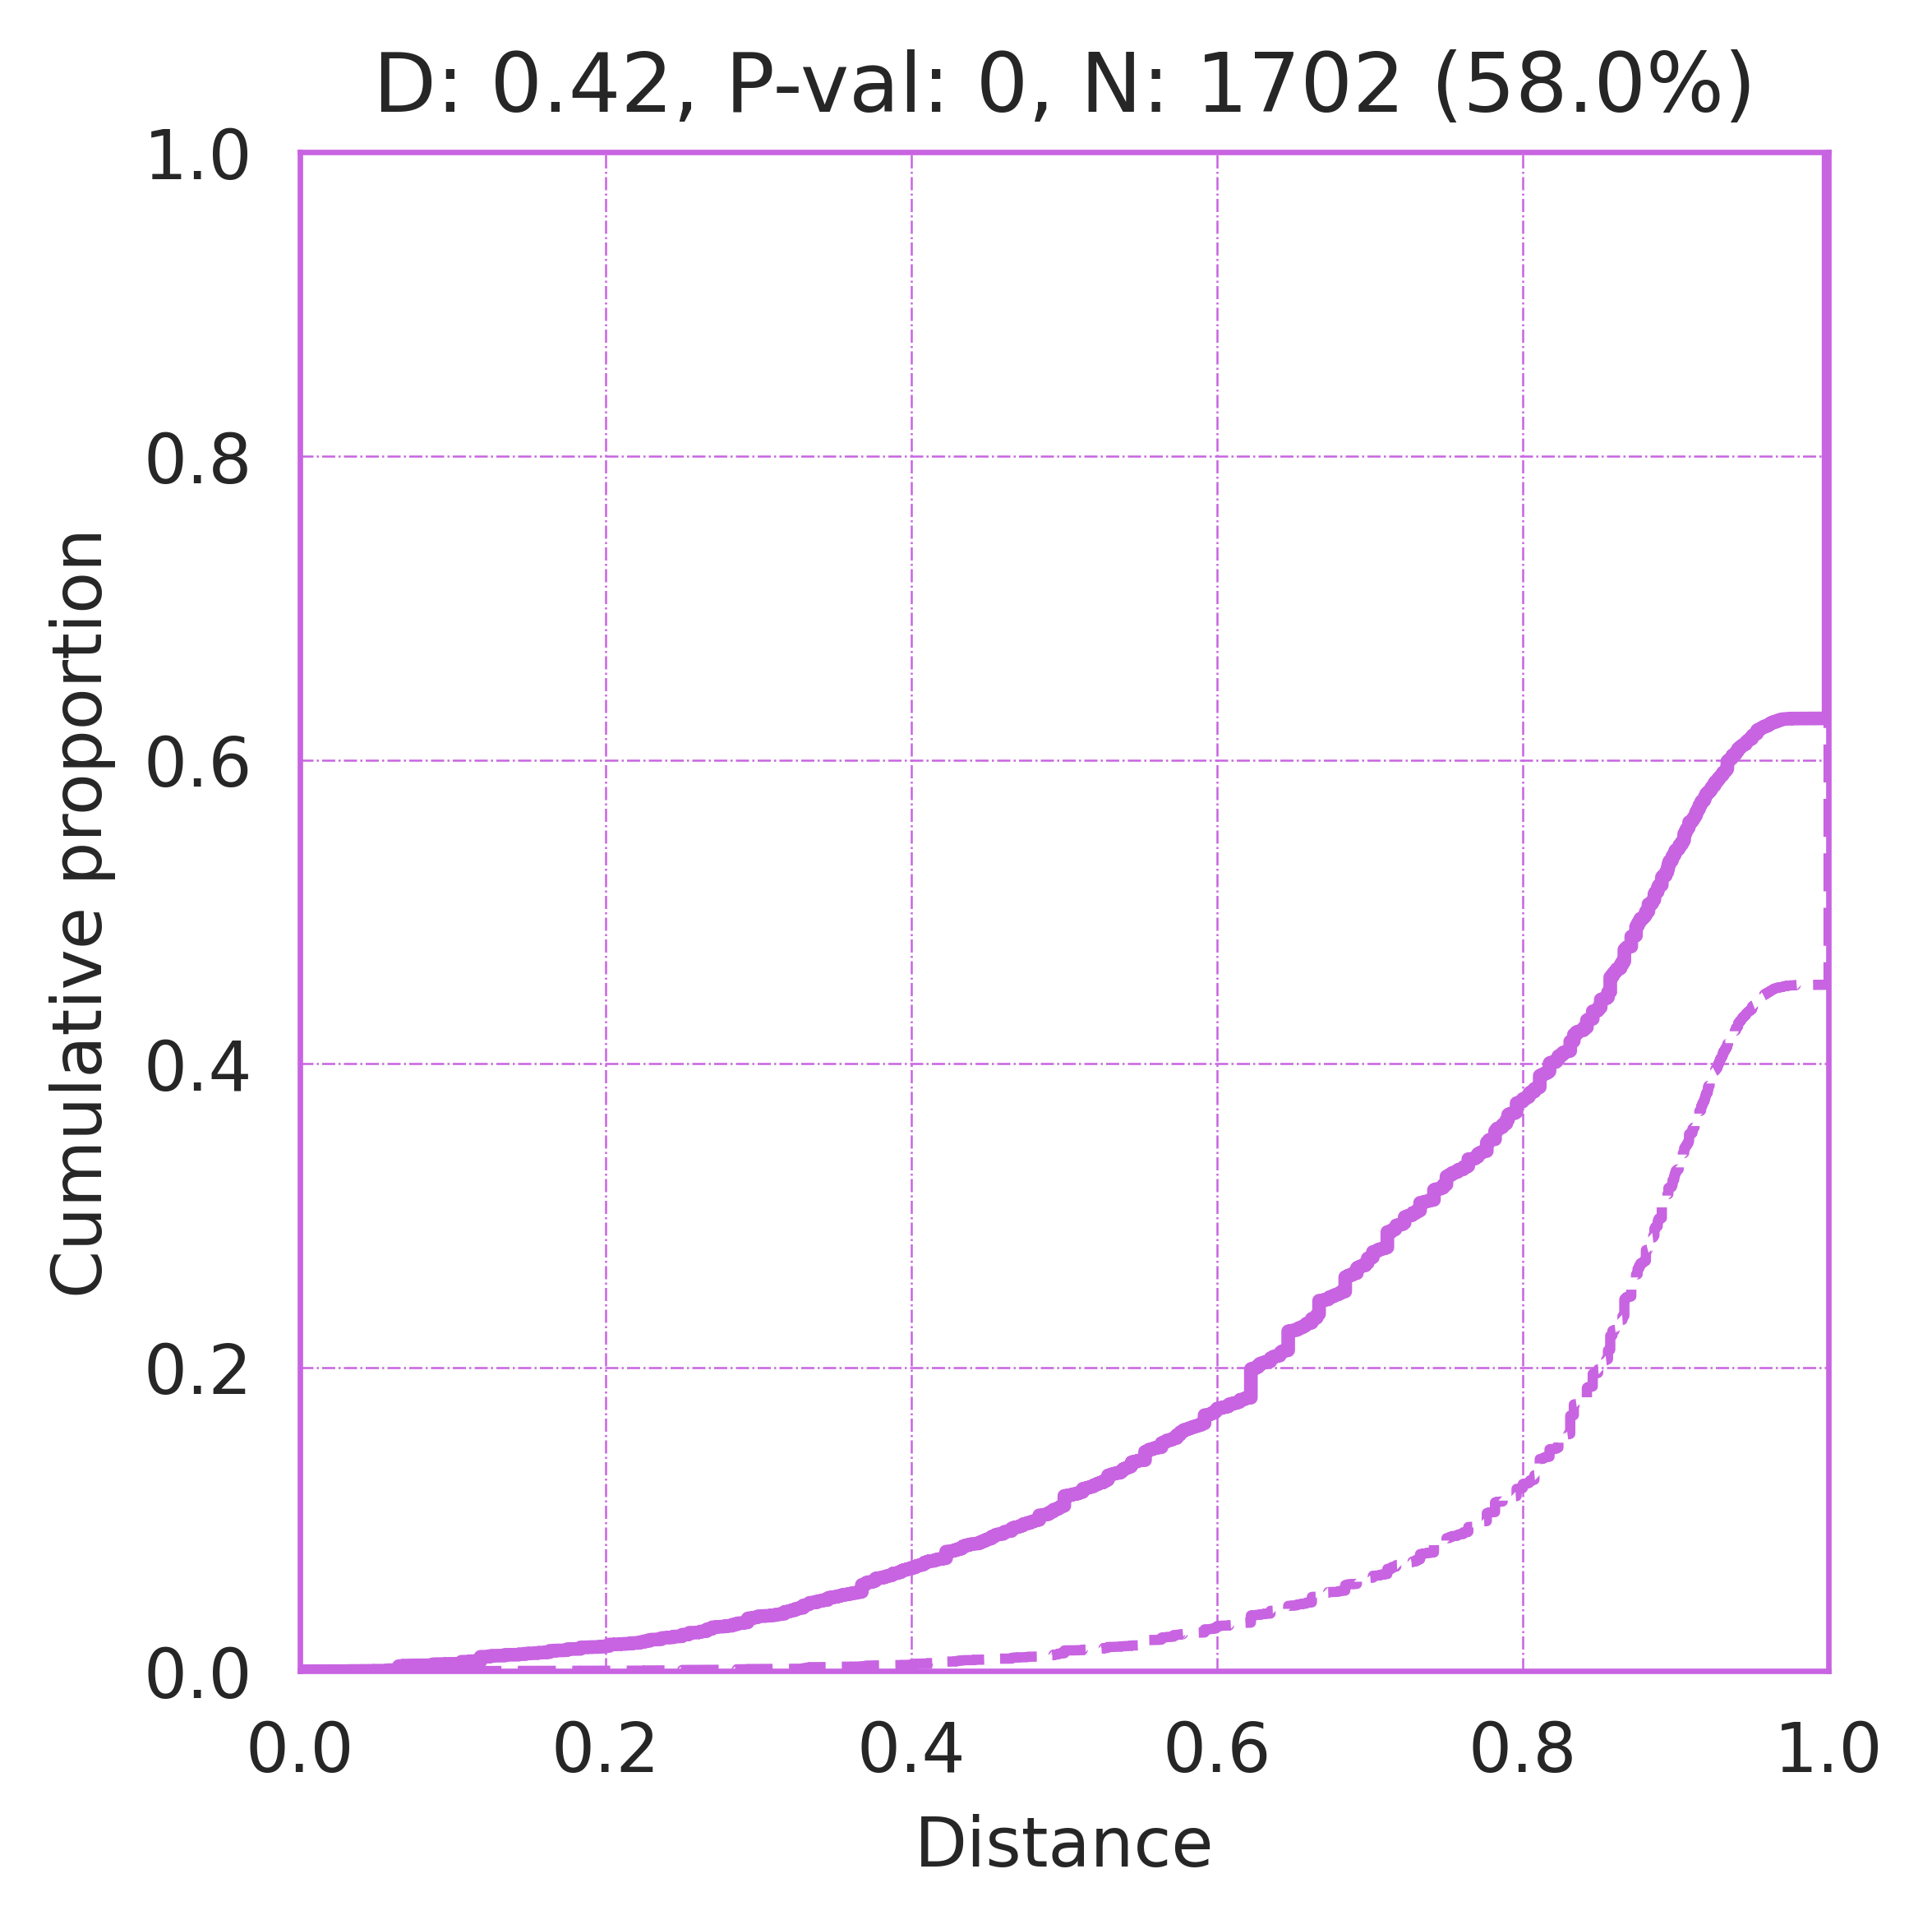

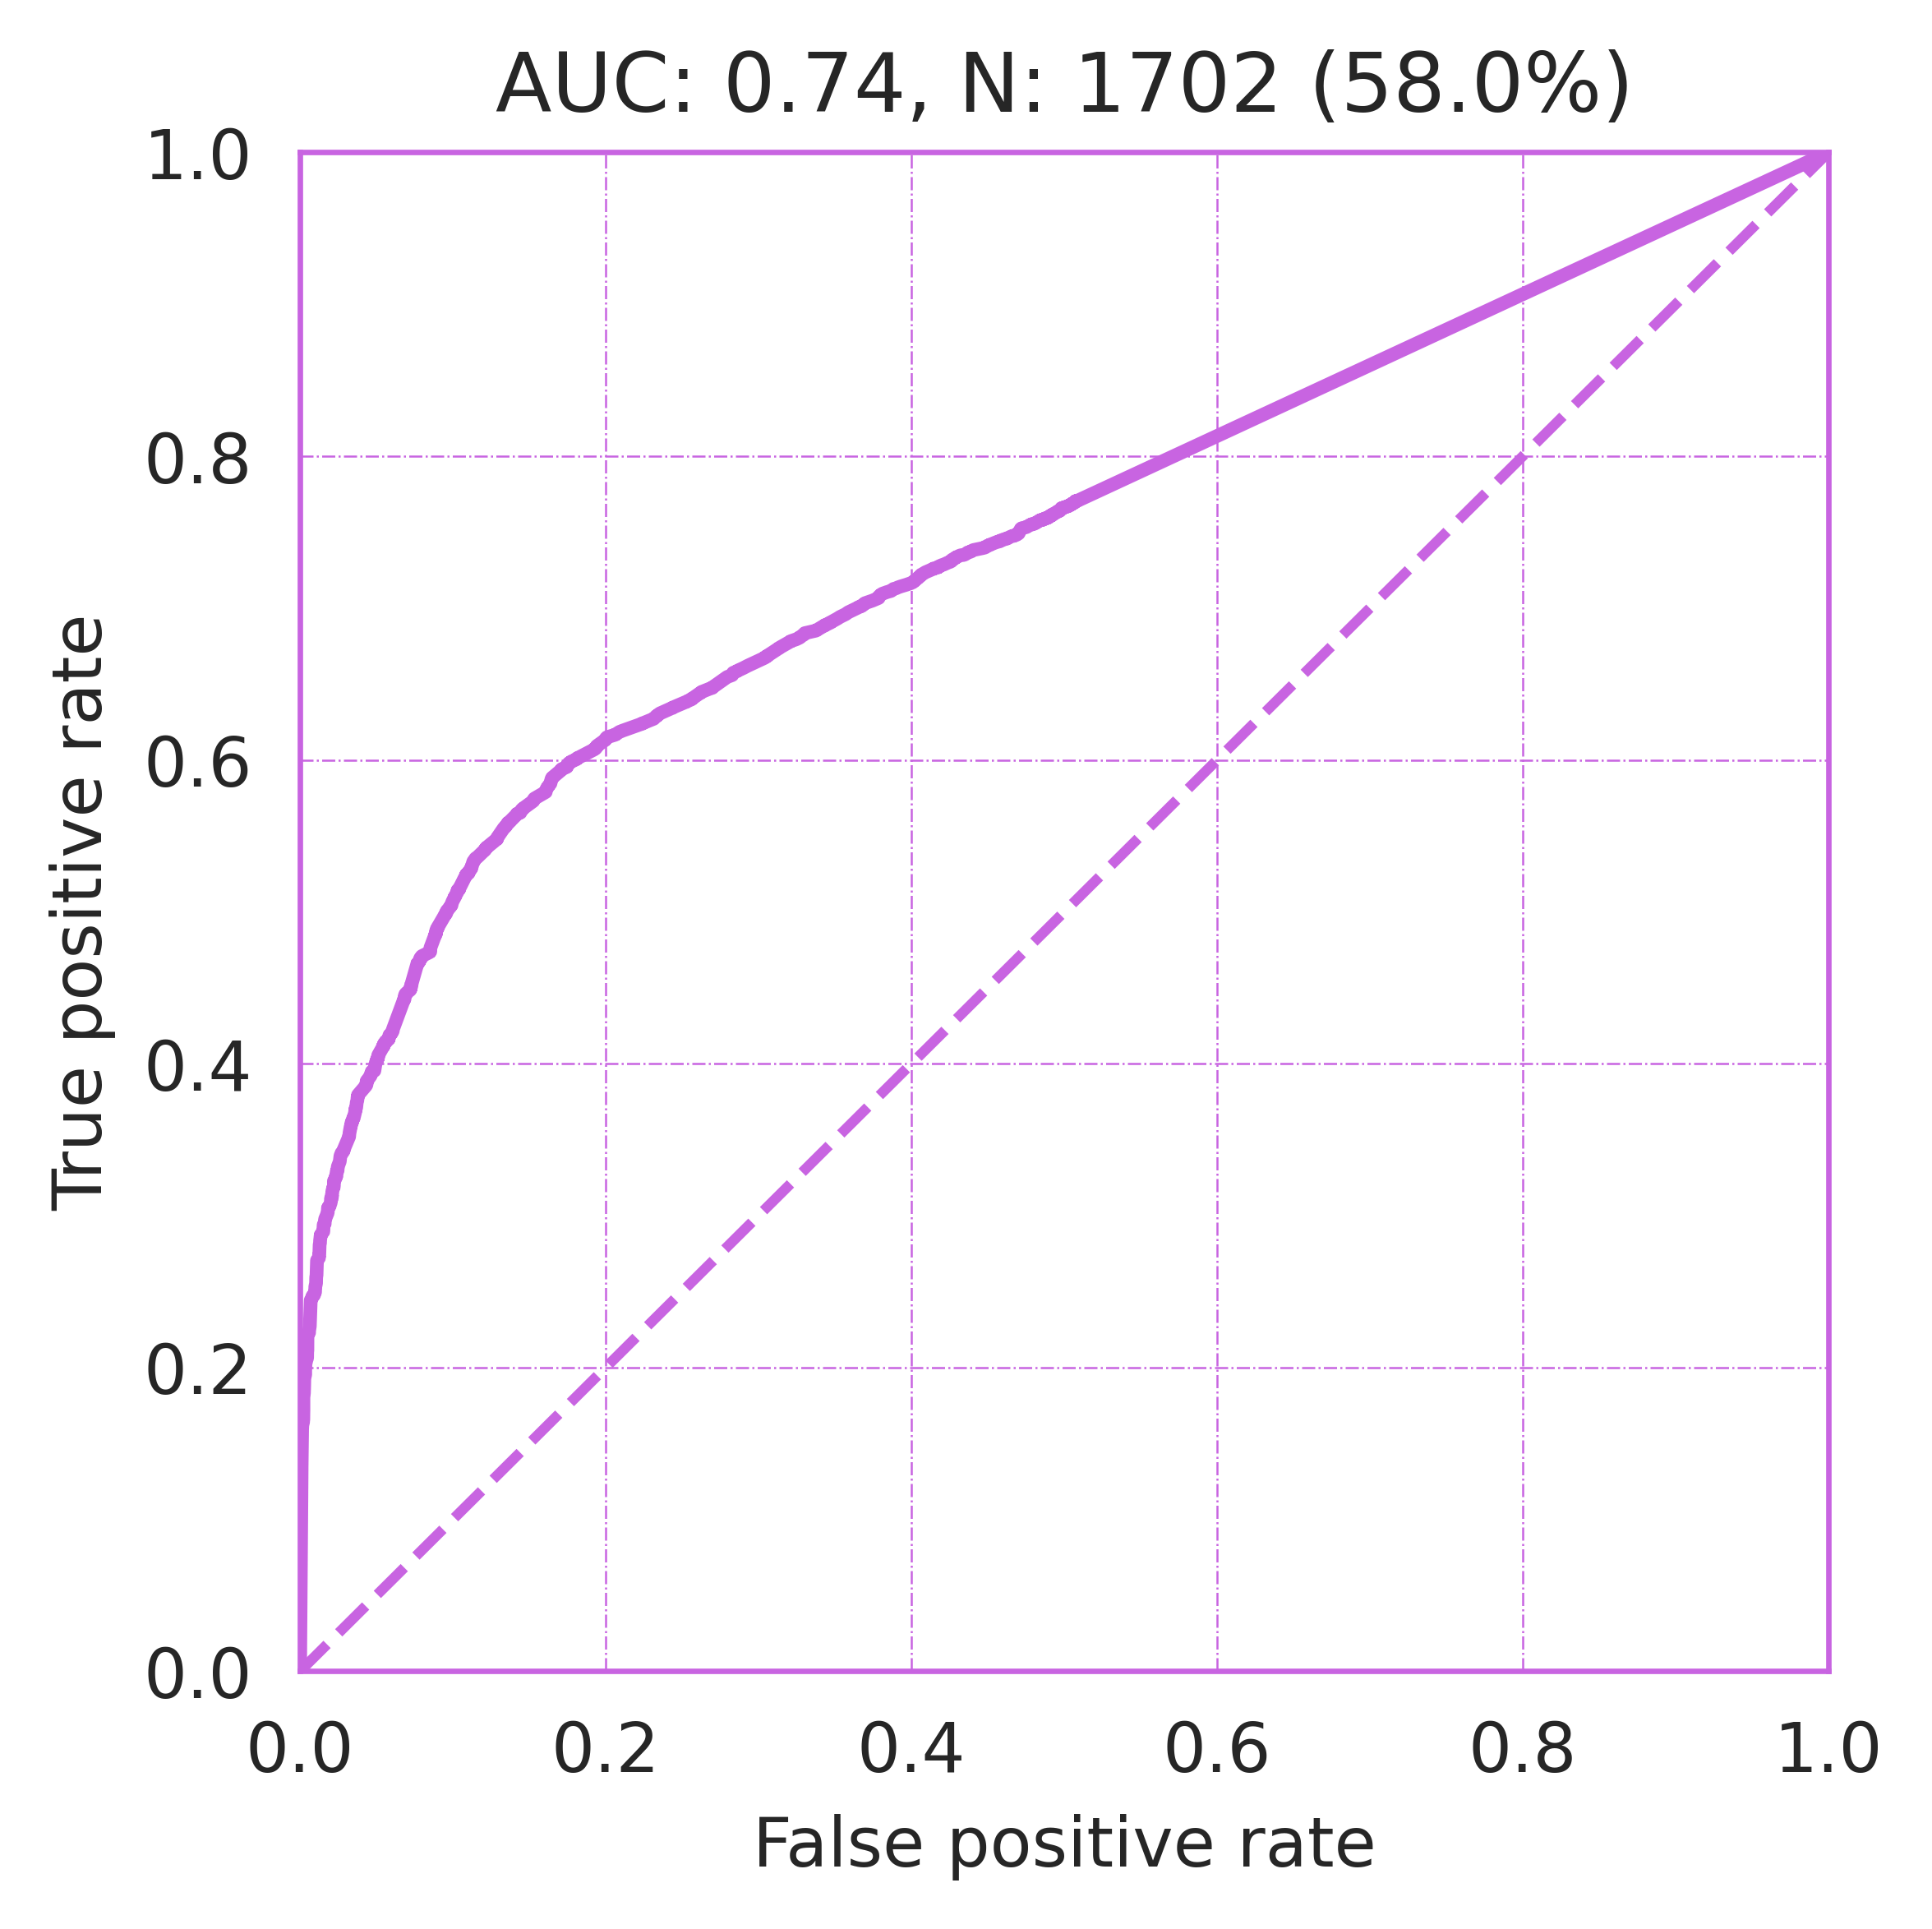

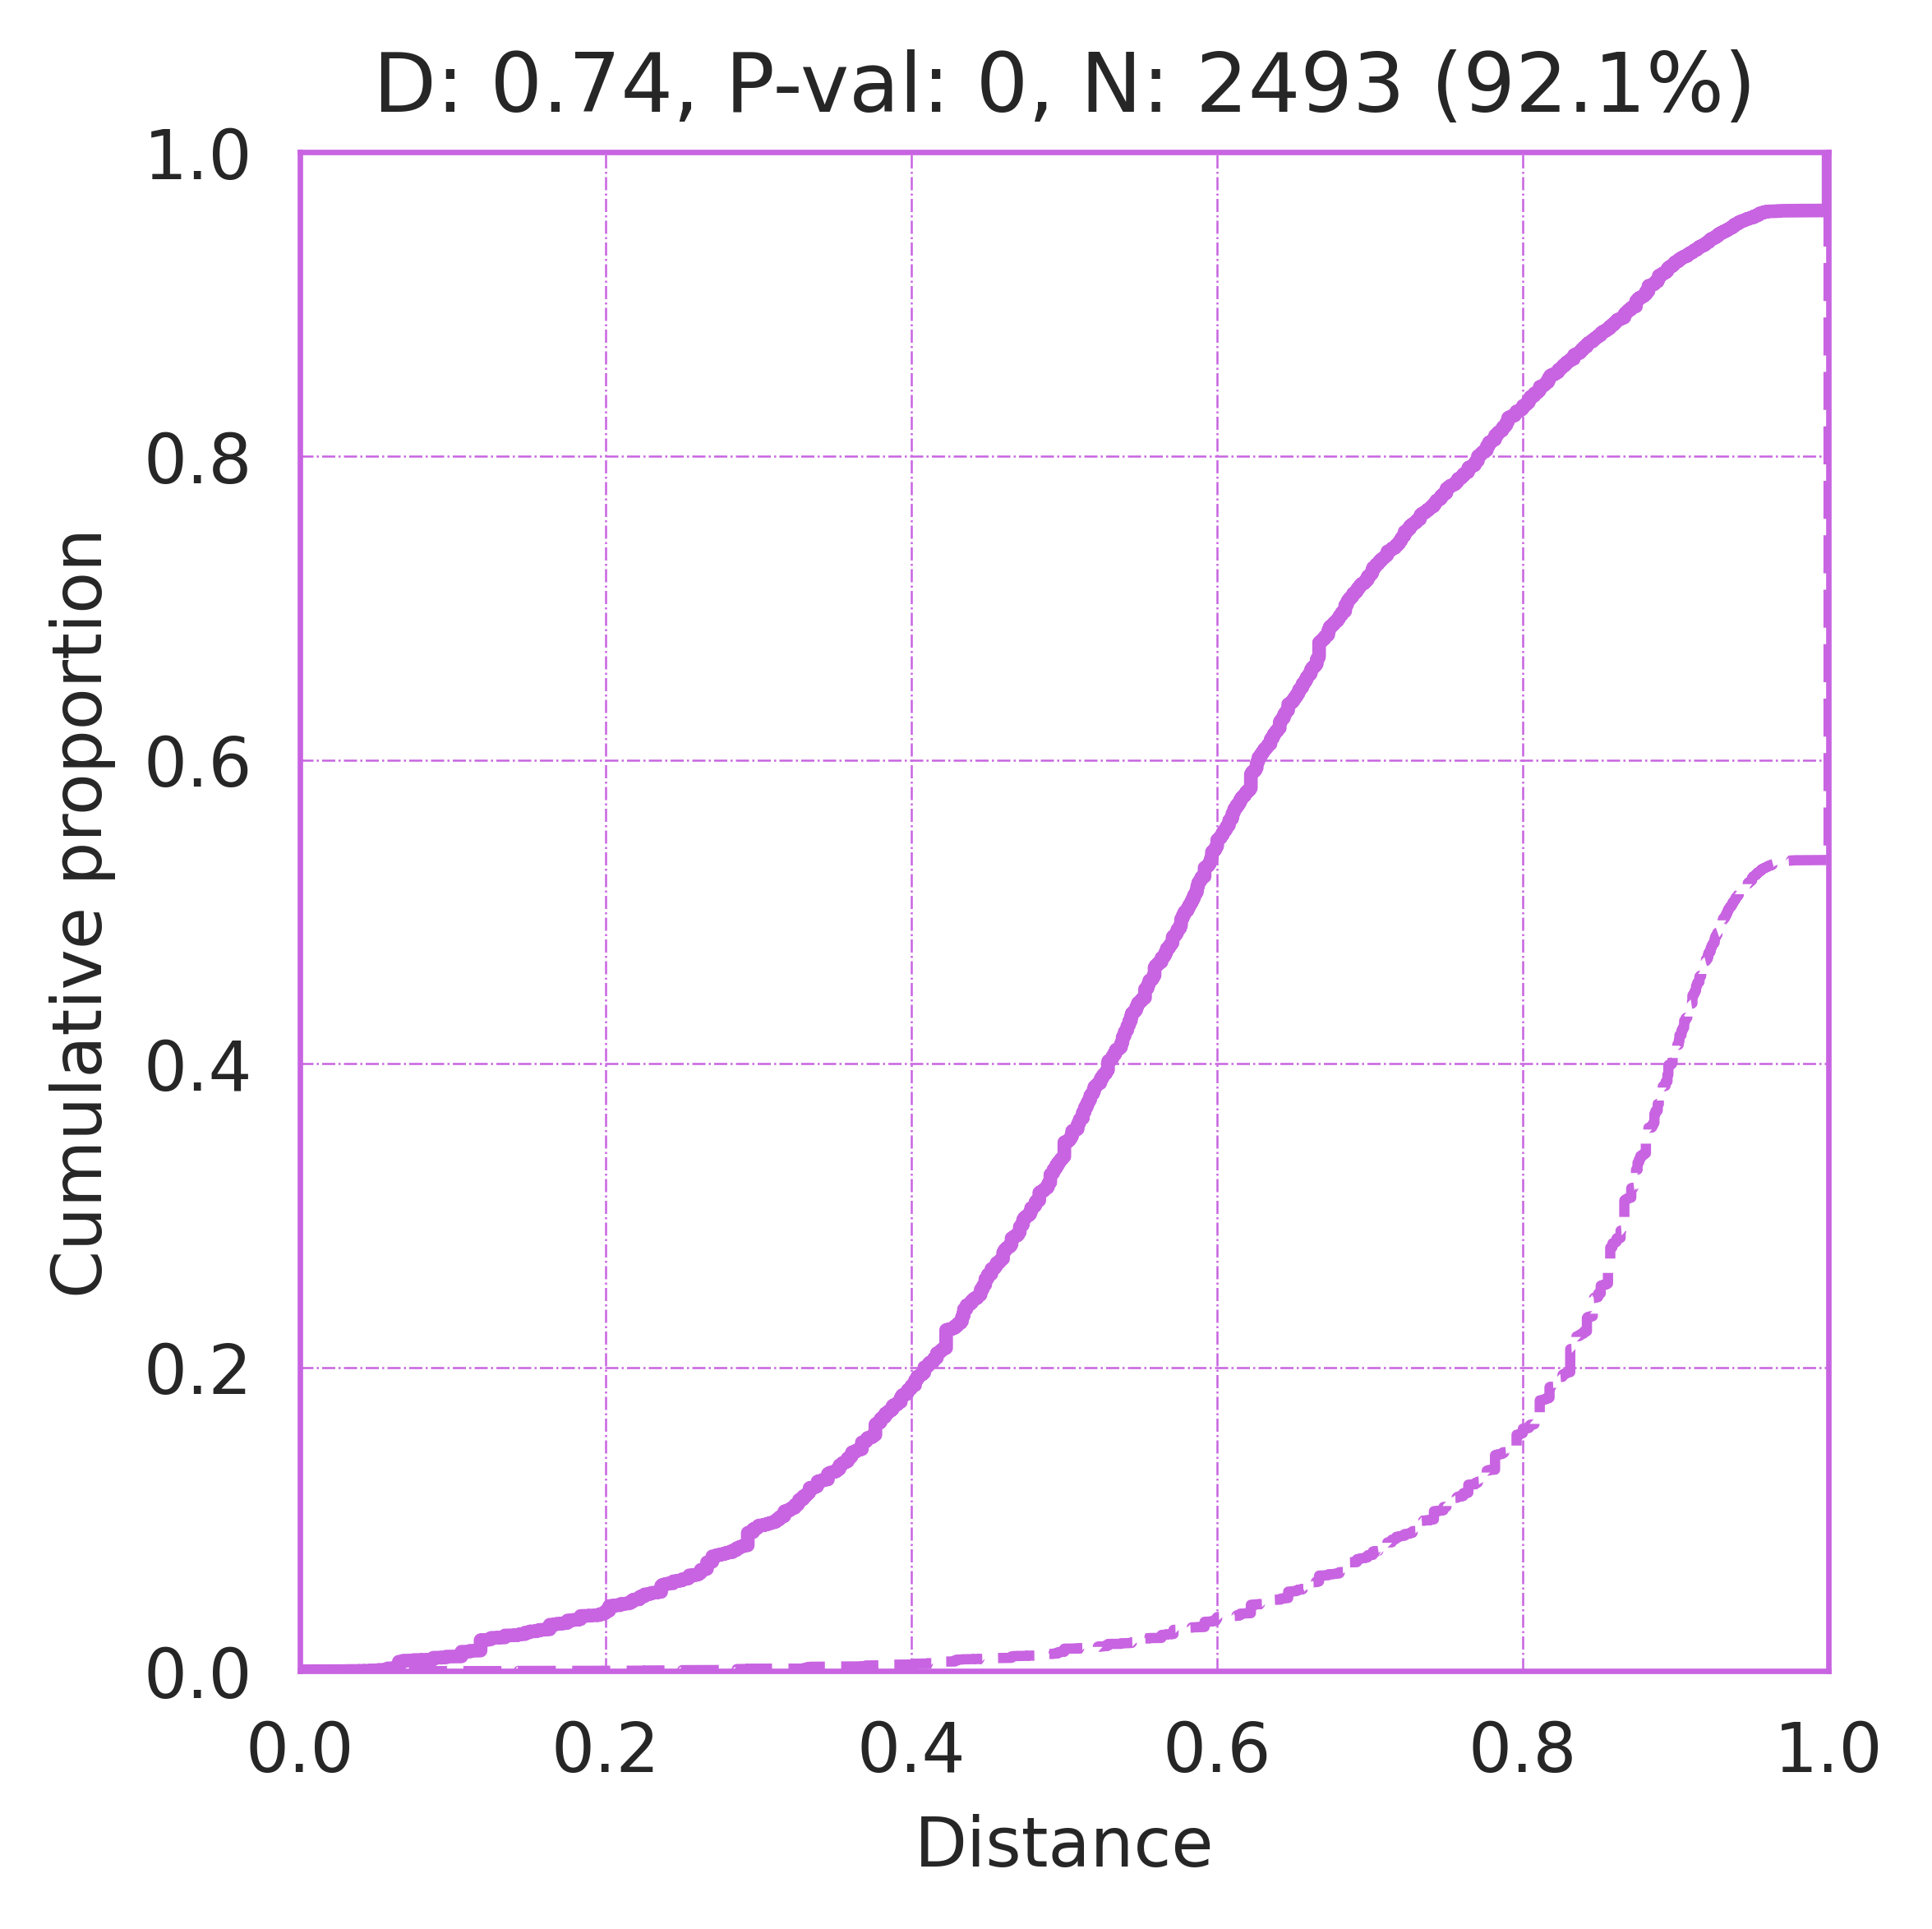

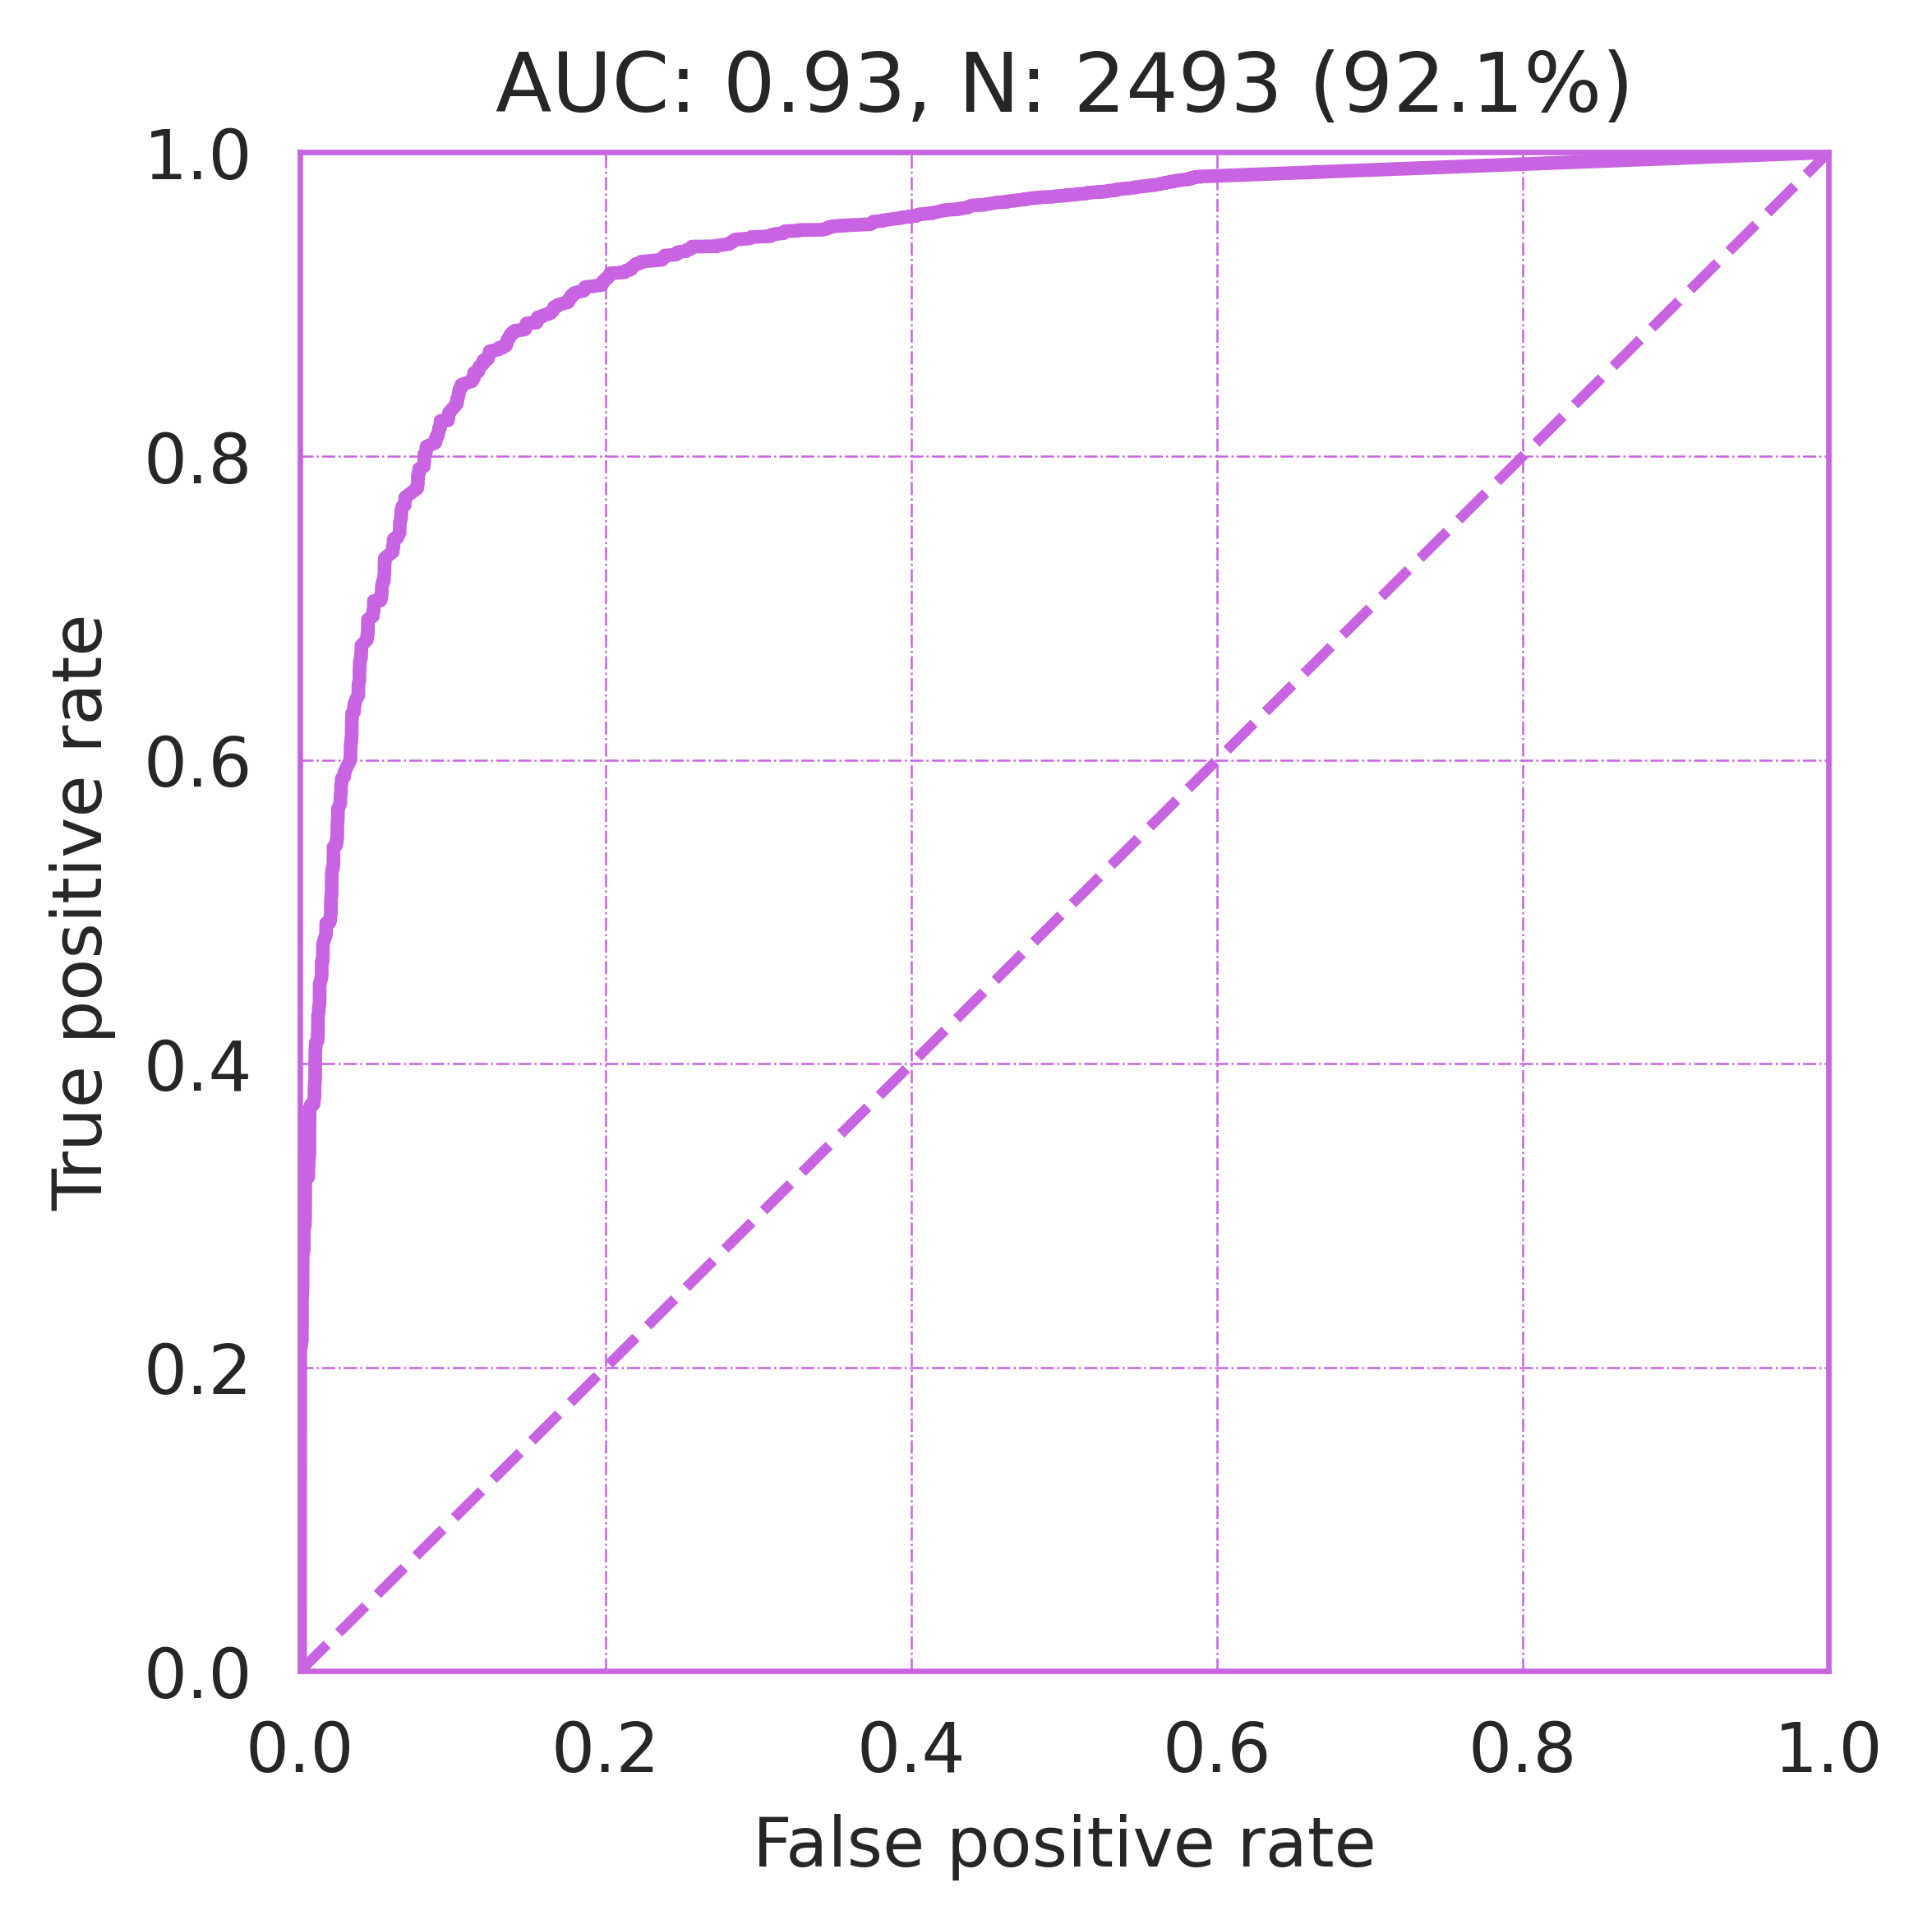

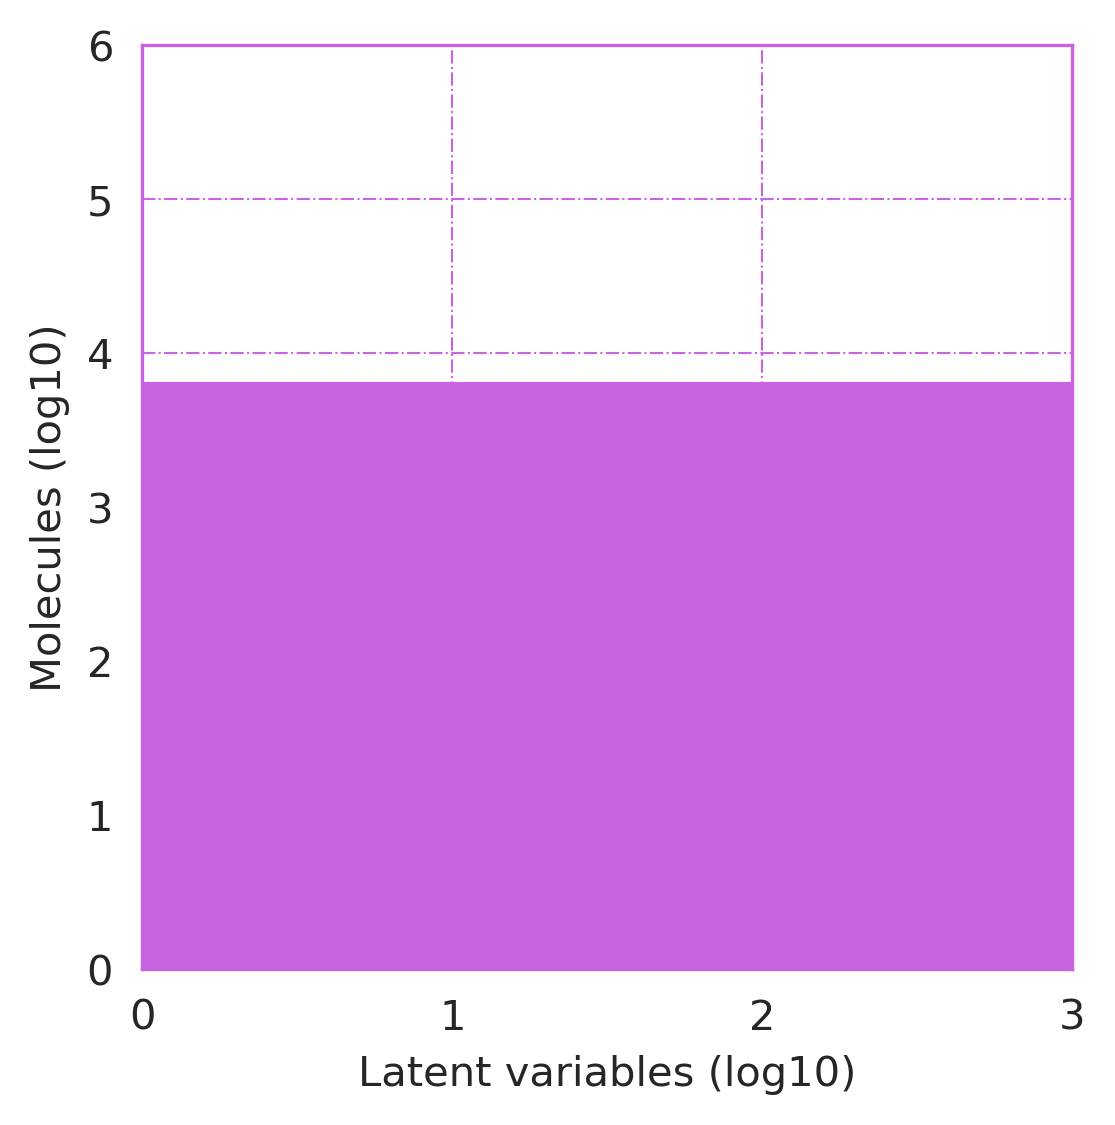

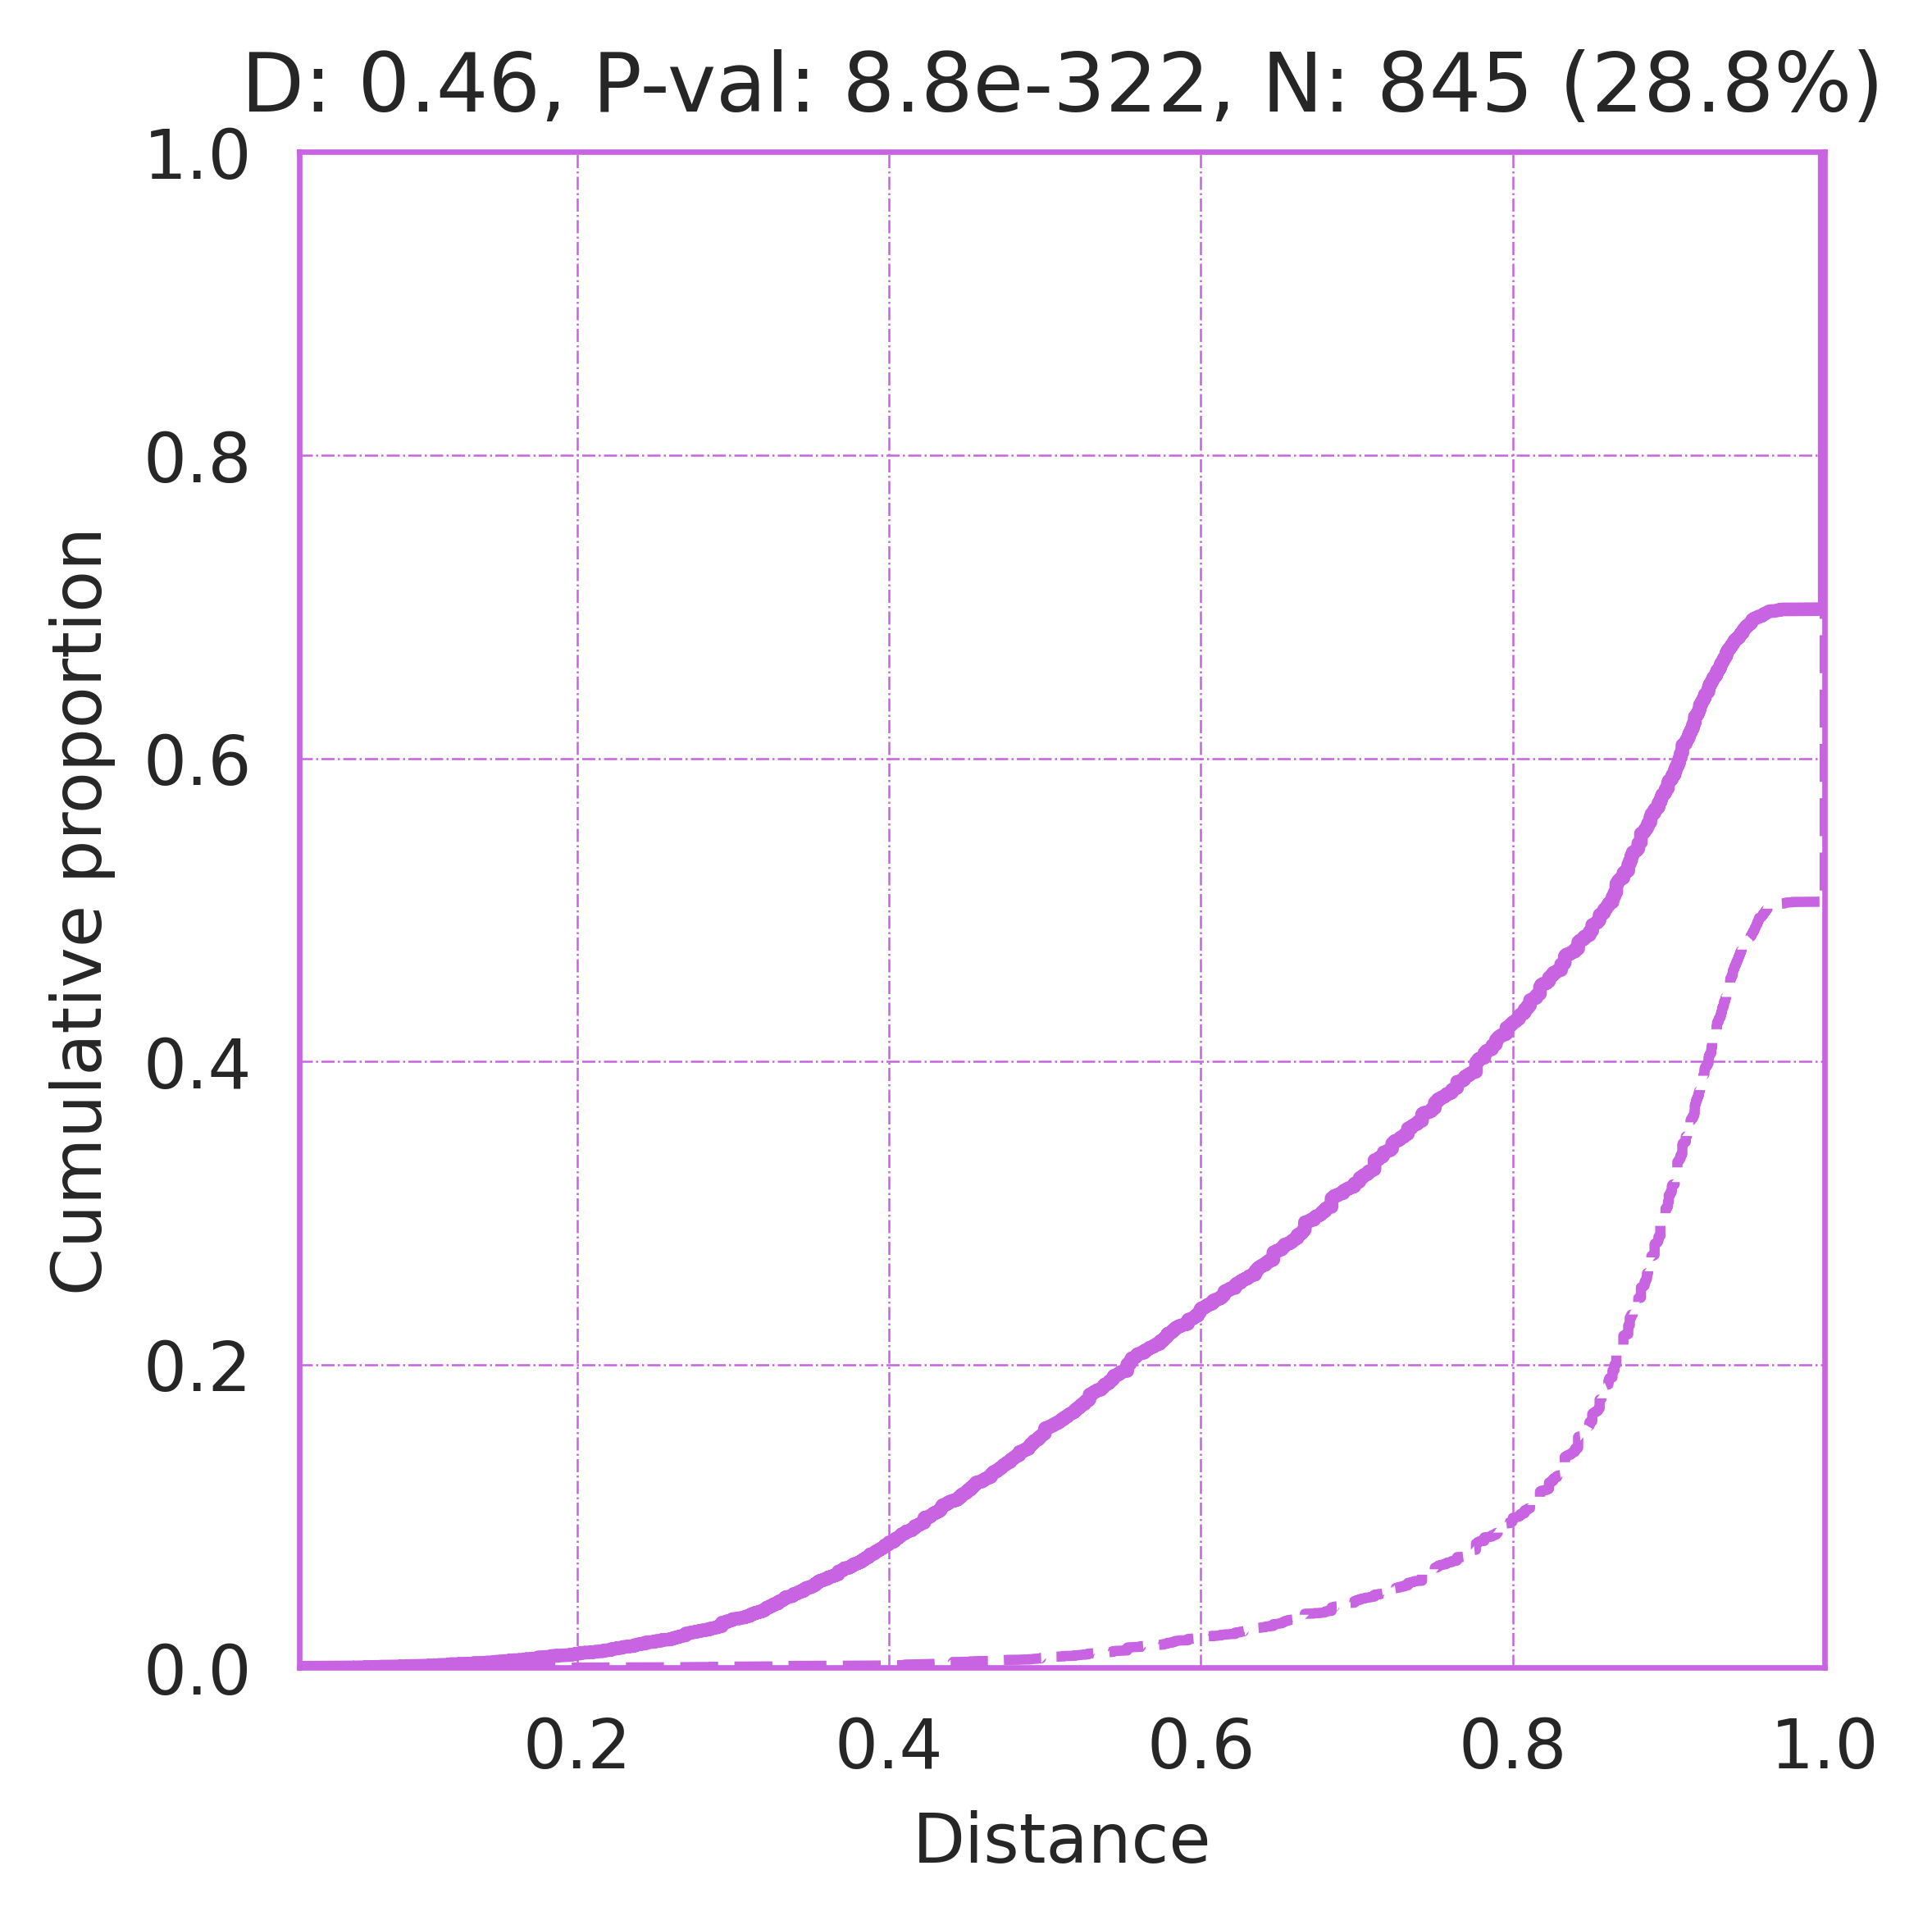

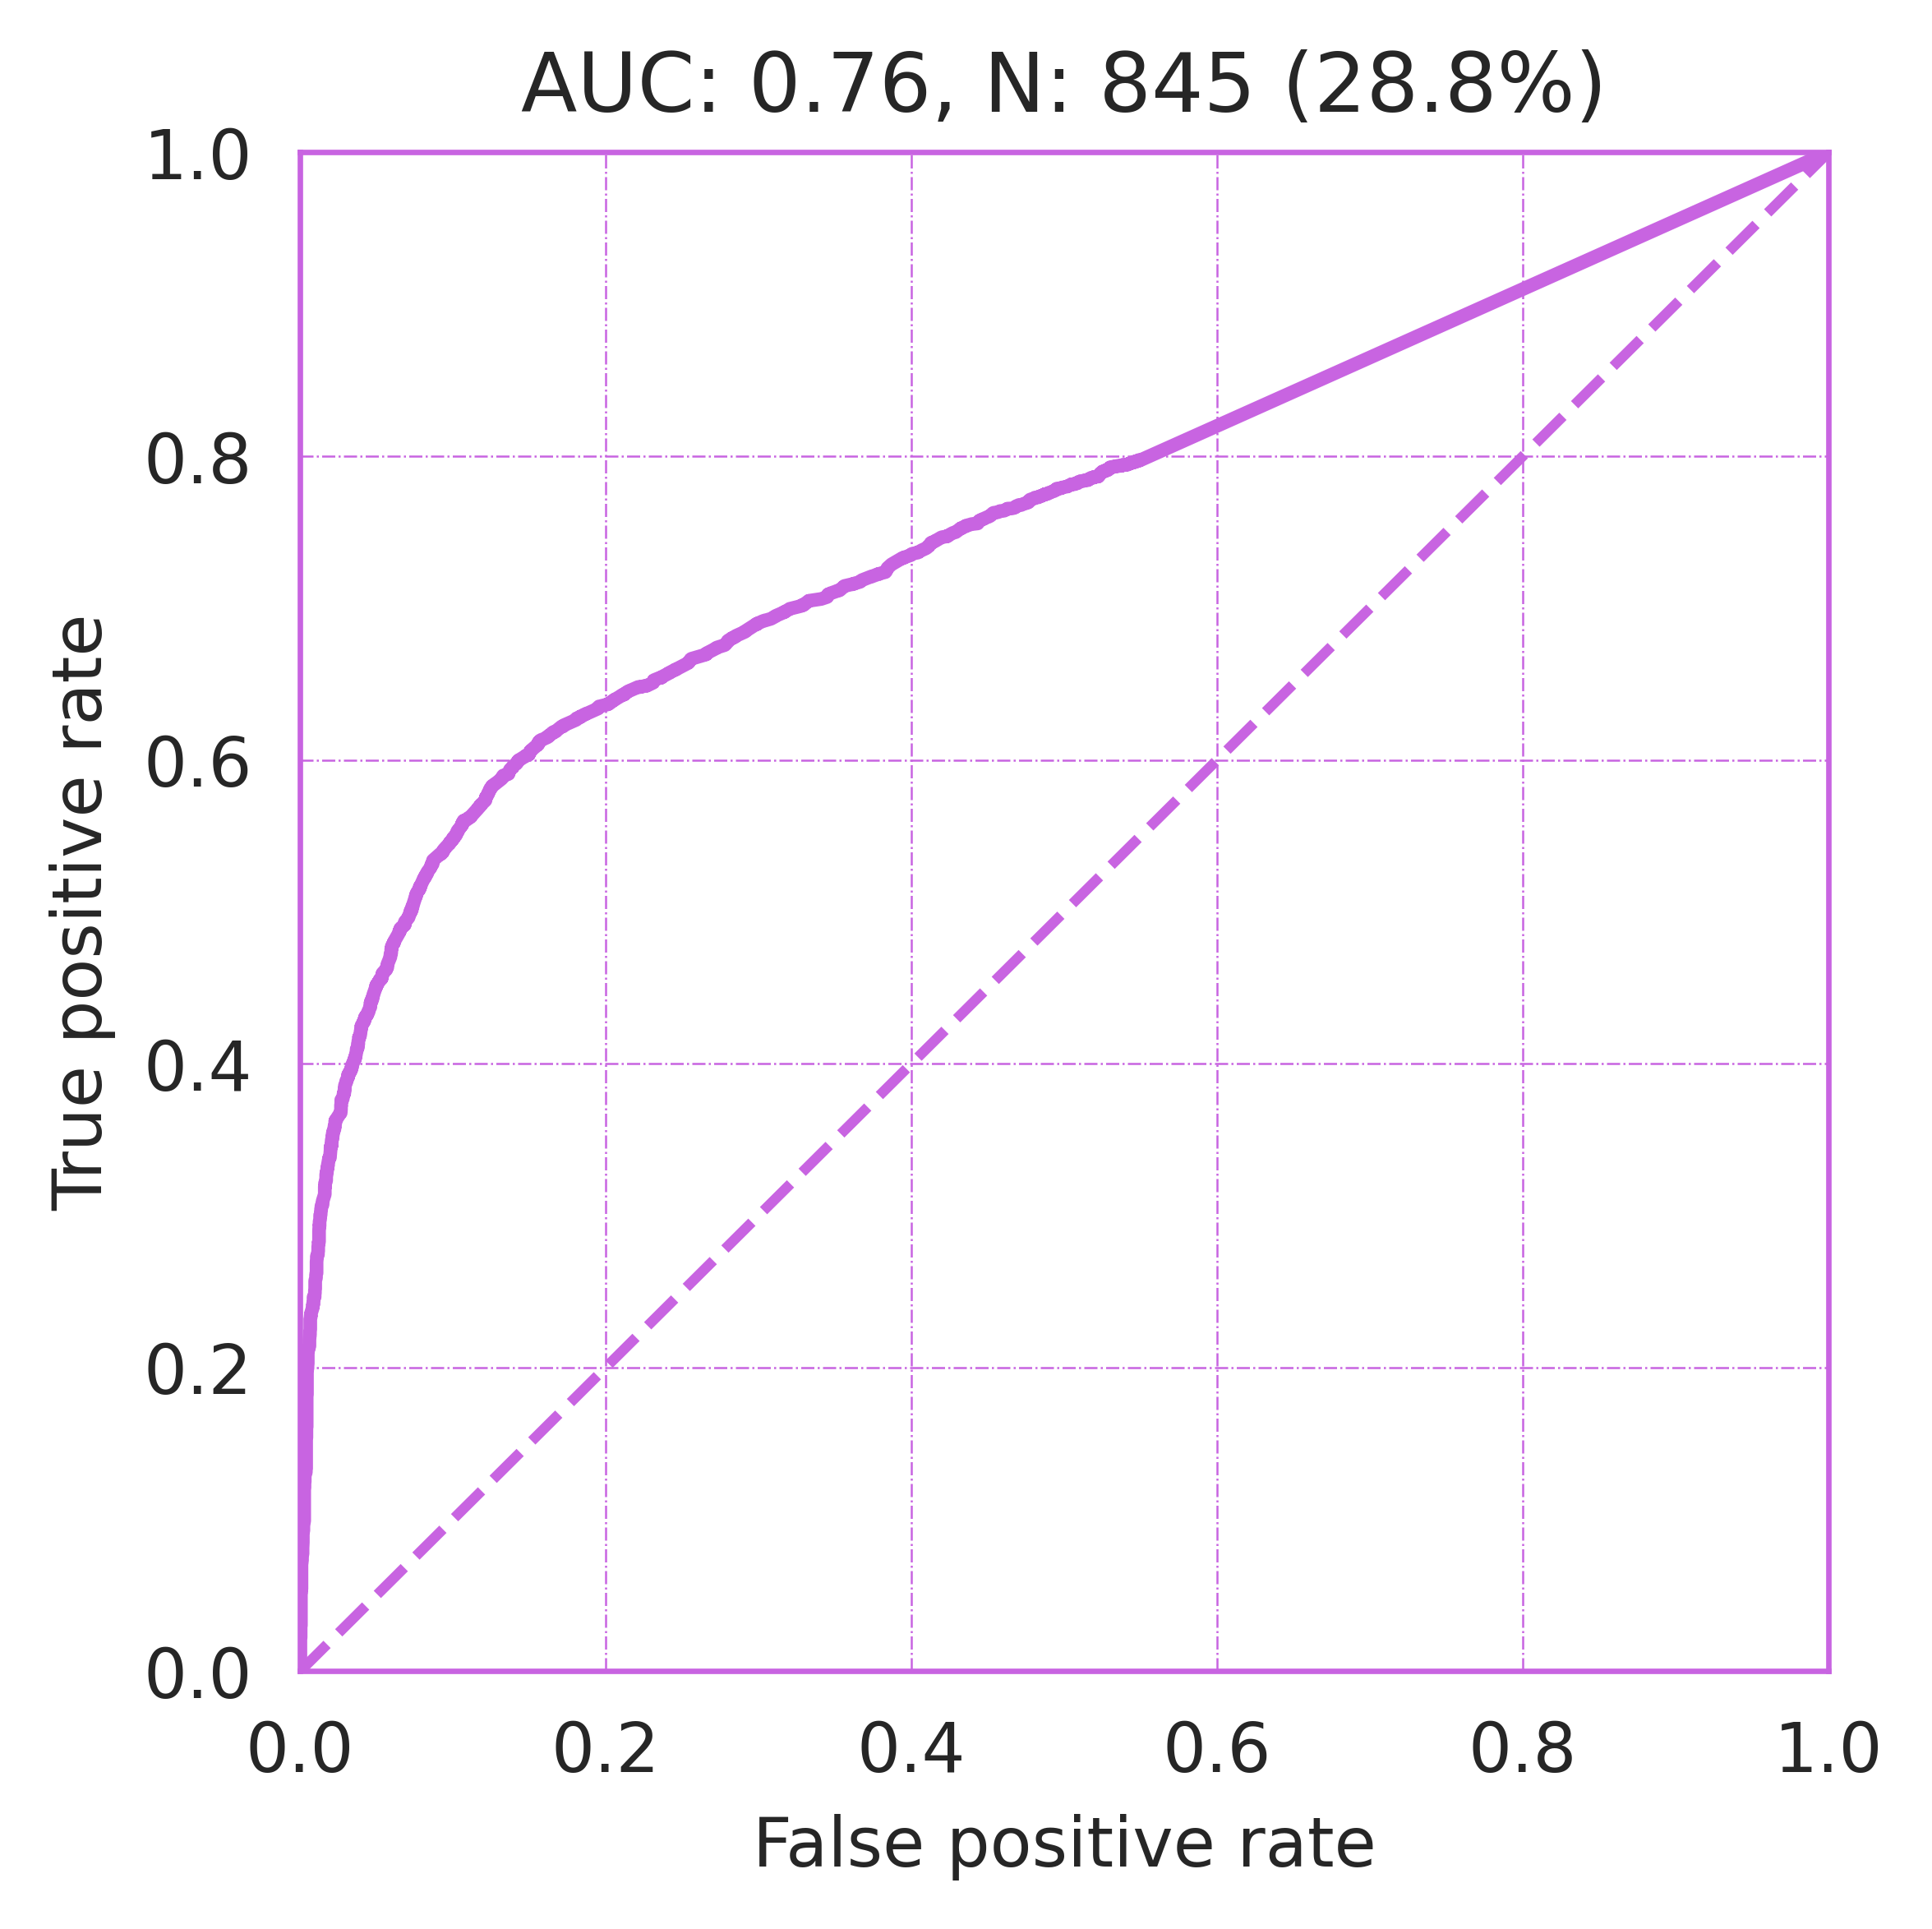

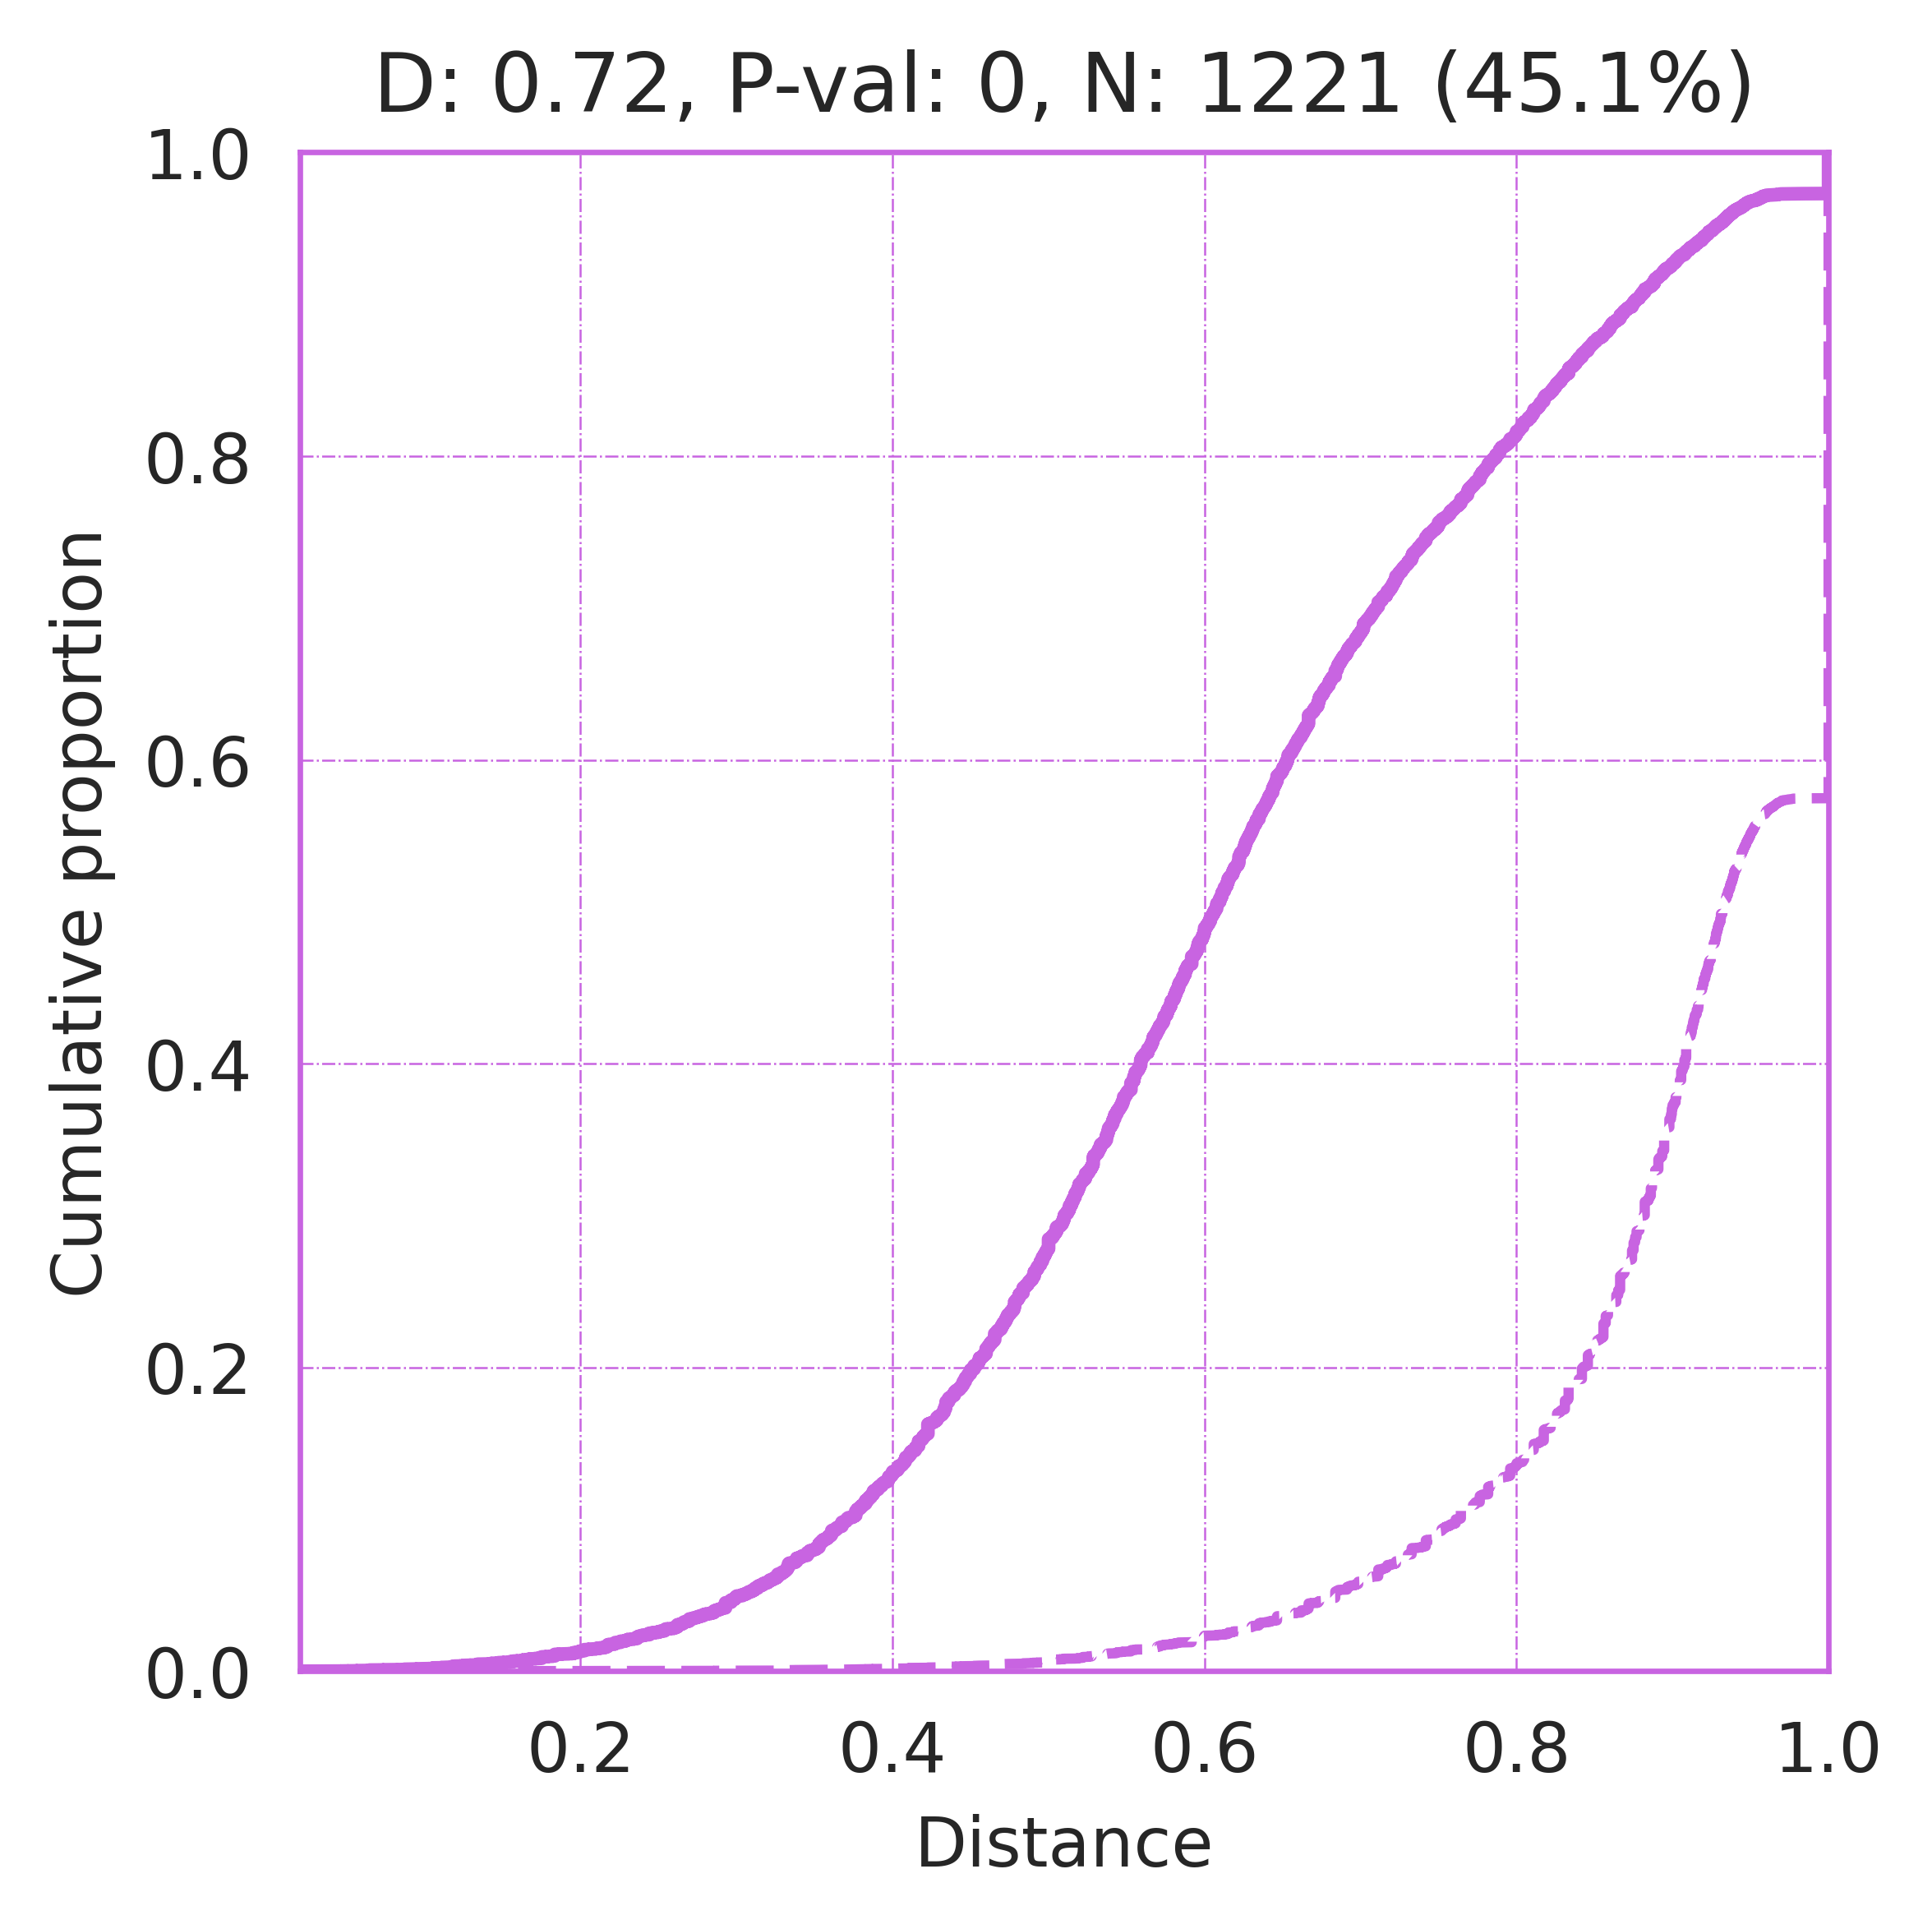

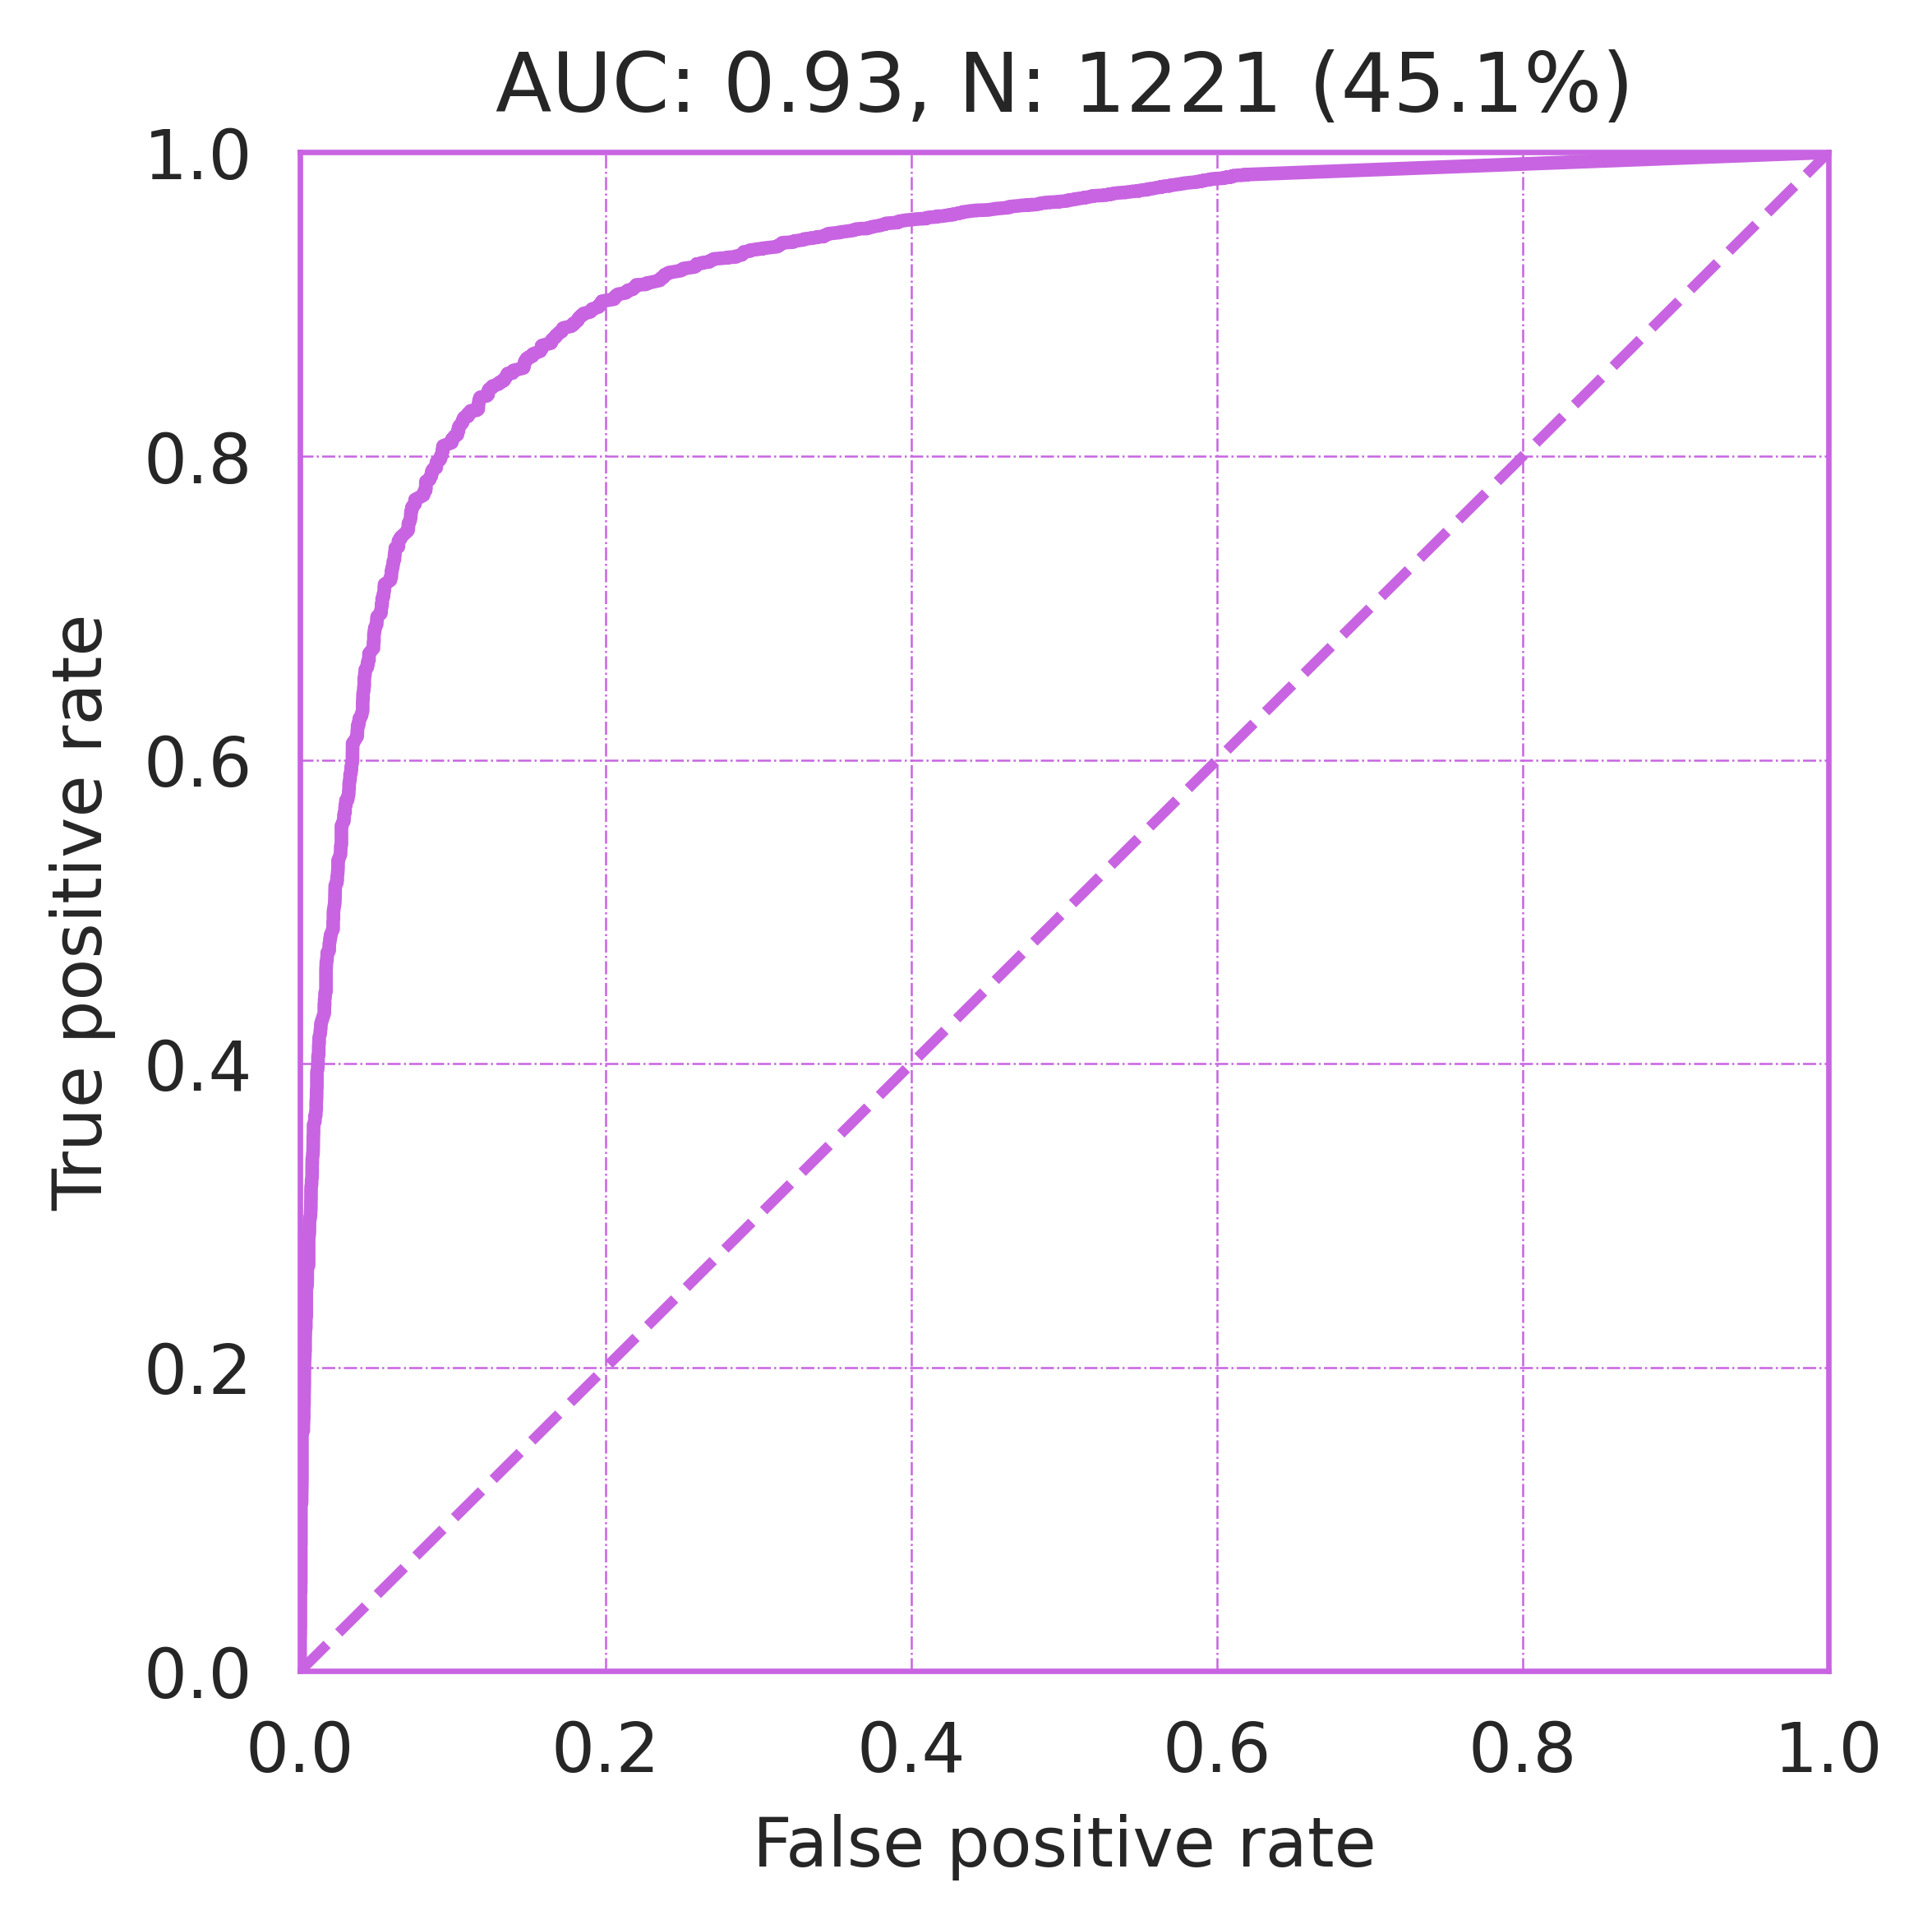

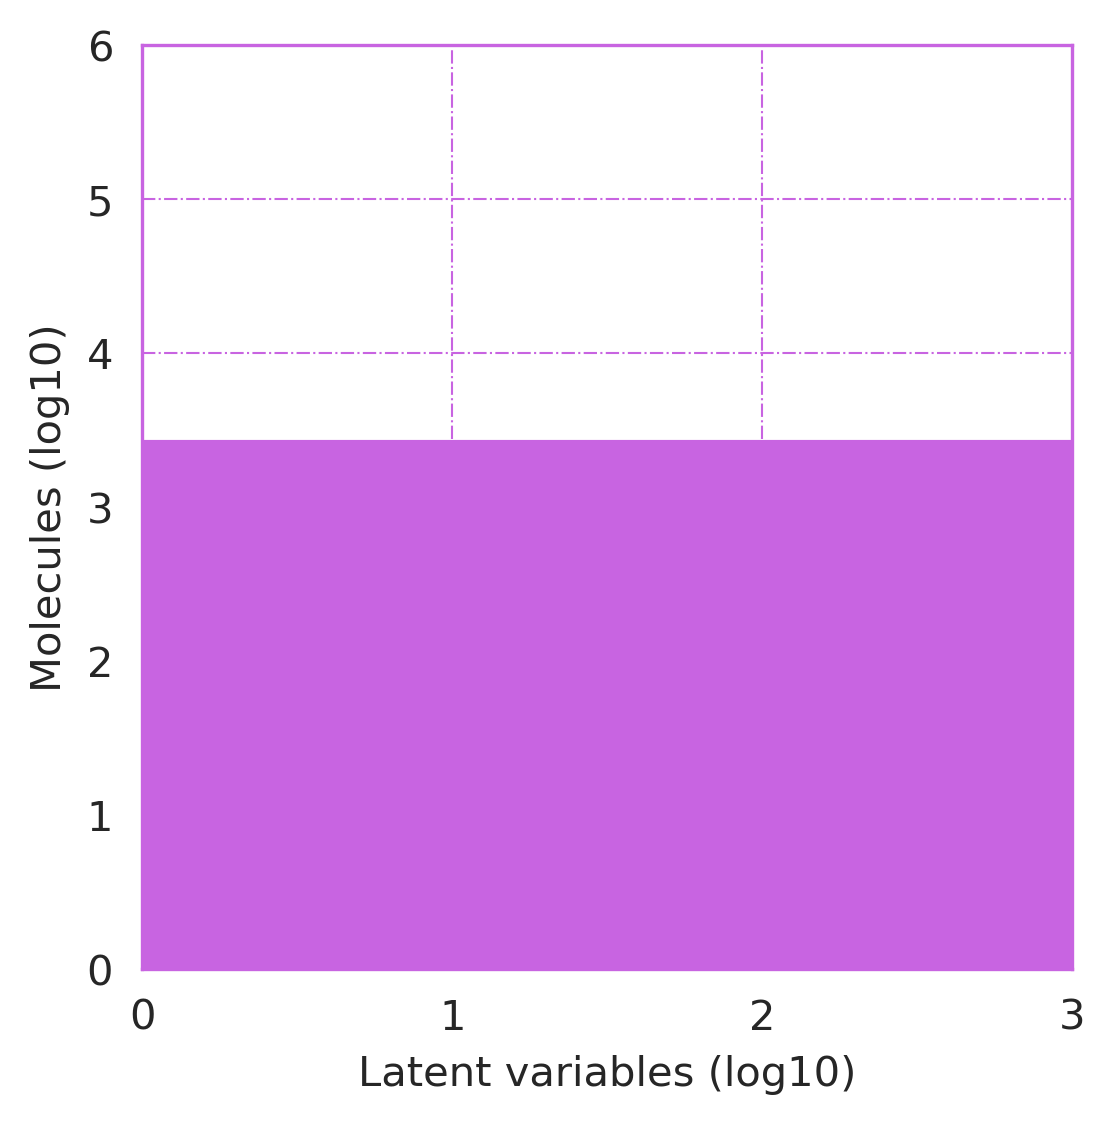

In [6]:
# Dataset Name
dataset = 'B1.002'

# Instantiation of sign0 data structures for the new space: full and reference
sign0 = cc_local.signature(dataset, 'sign0')

# Cleaning both full and reference datasets. This is crucial!
sign0.clear_all()

# Fit sign0
sign0.fit(pairs=np.array(merged_pairs))

In [7]:
sign0.shape

(6283, 1314)

2024-10-21 10:52:34,427 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_B1/full/B/B1/B1.002/sign0
2024-10-21 10:52:34,446 chemicalchecker.core.chemcheck.ChemicalChecker [DEBUG   ] ChemicalChecker with root: /aloy/home/acomajuncosa/Protocols/local_CC_B1
2024-10-21 10:52:35,299 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Across ROC
2024-10-21 10:52:35,303 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_B1/full/A/A1/A1.001/sign0
2024-10-21 10:53:31,076 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_B1/full/A/A1/A1.001/sign0
2024-10-21 10:53:36,862 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 5801 rows from dataset V
2024-10-21 10:55:12,521 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 5801 rows from dataset V

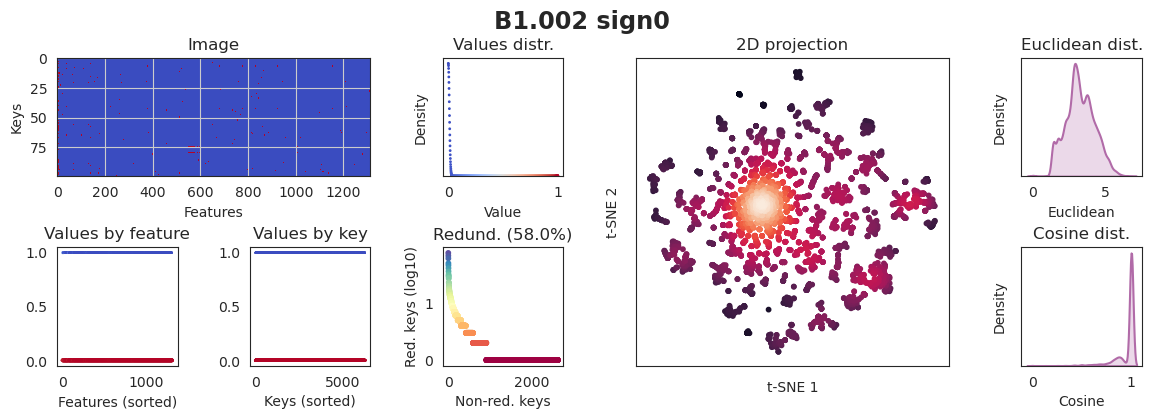

In [8]:
# Instantiation of sign0
sign0 = cc_local.signature(dataset, 'sign0')

# Instantiation of diag0 (diagnosis plots)
diag0 = sign0.diagnosis(ref_cctype='sign0')

# Including M1 into the ROC diagnosis plot
diag0.across_roc(include_datasets=[dataset], save=True, plot=False)

# Plot medium & small diagnosis plots
diag0.canvas(size='medium', savefig=True, savefig_kwargs={'dpi': 300})
diag0.canvas(size='small', savefig=True, savefig_kwargs={'dpi': 300})

In [9]:
np.min(np.array(sign0).flatten()), np.max(np.array(sign0).flatten())

(0.0, 1.0)

## sign1 ##